# 1. BTC/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 165ms/step - loss: 0.0471 - val_loss: 0.0120
Epoch 2/100
20/20 [==============================] - 2s 120ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 3/100
20/20 [==============================] - 2s 119ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 4/100
20/20 [==============================] - 2s 113ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 5/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/100
20/20 [==============================] - 2s 113ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 7/100
20/20 [==============================] - 2s 114ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 8/100
20/20 [==============================] - 2s 113ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 9/100
20/20 [==============================] - 2s 111ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 10/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0018 - val_lo

In [11]:
y_pred=model.predict(X_test)

15/15 [==============================] - 0s 21ms/step


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 48.99339972726086
RMSE: 0.019472418383964504
MAE: 0.0149310375409748


In [13]:
y_pred=scaler.inverse_transform(y_pred)

In [14]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

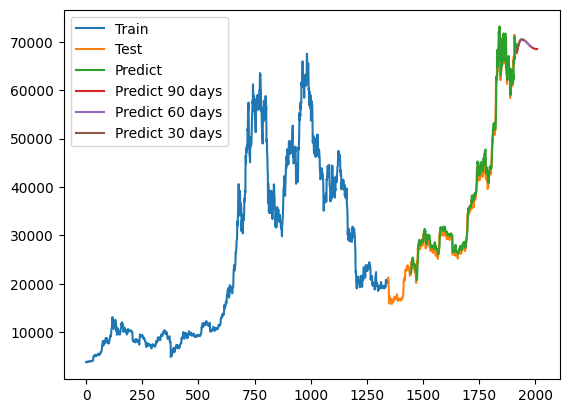

In [15]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 2. ETH/USD Dataset (Data split 7:3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 168ms/step - loss: 0.0333 - val_loss: 0.0023
Epoch 2/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0036 - val_loss: 0.0016
Epoch 3/100
20/20 [==============================] - 2s 111ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 4/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 5/100
20/20 [==============================] - 2s 115ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 6/100
20/20 [==============================] - 2s 114ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 7/100
20/20 [==============================] - 2s 111ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 8/100
20/20 [==============================] - 2s 110ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/100
20/20 [==============================] - 2s 110ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 2s 117ms/step - loss: 0.0020 - val_lo

In [10]:
y_pred=model.predict(X_test)

15/15 [==============================] - 1s 21ms/step


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 31.361845796535416
RMSE: 0.021415202515989162
MAE: 0.015194937977242993


In [12]:
y_pred=scaler.inverse_transform(y_pred)

In [13]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

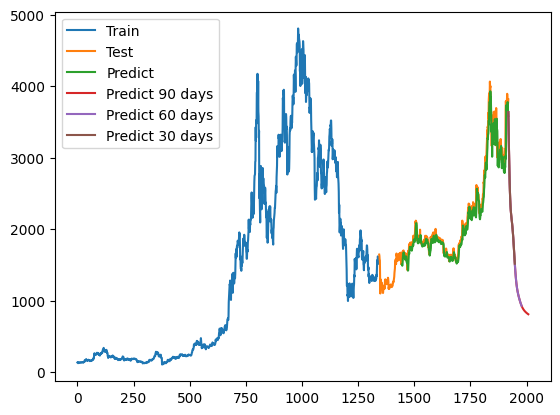

In [14]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 3. BNB/USD Dataset (Data split 7:3)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [16]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [17]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [19]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 149ms/step - loss: 0.0381 - val_loss: 0.0031
Epoch 2/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 3/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 4/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0037 - val_loss: 0.0024
Epoch 5/100
20/20 [==============================] - 2s 110ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 6/100
20/20 [==============================] - 2s 114ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 7/100
20/20 [==============================] - 2s 112ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 8/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 9/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 10/100
20/20 [==============================] - 2s 110ms/step - loss: 0.0025 - val_lo

In [24]:
y_pred=model.predict(X_test)

15/15 [==============================] - 1s 21ms/step


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 40.478900074210614
RMSE: 0.018638138404614275
MAE: 0.013955619481289675


In [26]:
y_pred=scaler.inverse_transform(y_pred)

In [27]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

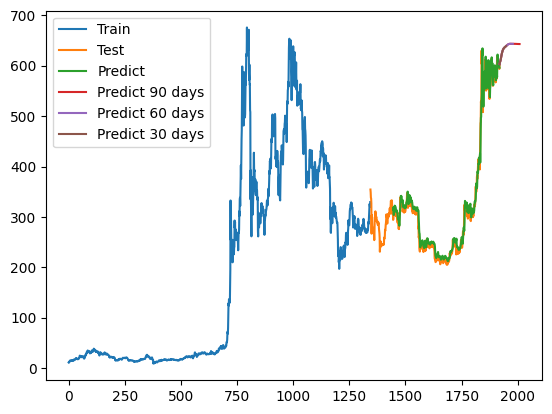

In [28]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 4. BTC/USD Dataset (Data split 8:2)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [30]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [31]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [32]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [33]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [35]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 7s 138ms/step - loss: 0.0431 - val_loss: 0.0152
Epoch 2/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 3/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 4/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 5/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 6/100
23/23 [==============================] - 2s 105ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/100
23/23 [==============================] - 2s 107ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 8/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 9/100
23/23 [==============================] - 2s 105ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 10/100
23/23 [==============================] - 3s 117ms/step - loss: 0.0016 - val_lo

In [38]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 23ms/step


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 45.423288109409796
RMSE: 0.02523101135365822
MAE: 0.0175668876323852


In [40]:
y_pred=scaler.inverse_transform(y_pred)

In [41]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

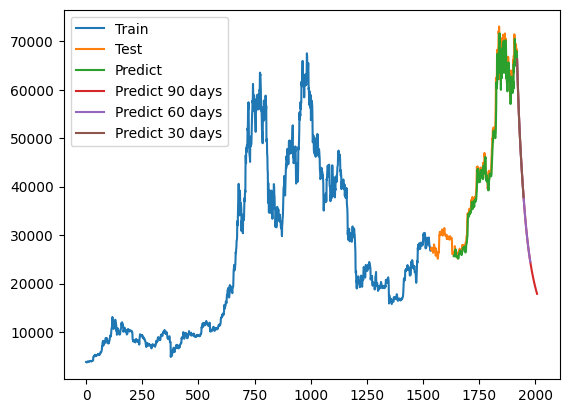

In [42]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 5. ETH/USD Dataset (Data split 8:2)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [59]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [60]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [61]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [62]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [63]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [64]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 7s 139ms/step - loss: 0.0297 - val_loss: 0.0072
Epoch 2/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 3/100
23/23 [==============================] - 2s 104ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 4/100
23/23 [==============================] - 2s 104ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 6/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 7/100
23/23 [==============================] - 2s 104ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 8/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 9/100
23/23 [==============================] - 2s 108ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 10/100
23/23 [==============================] - 2s 105ms/step - loss: 0.0017 - val_lo

In [67]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 23ms/step


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 36.71986753061039
RMSE: 0.018540823797111382
MAE: 0.012279187106221704


In [69]:
y_pred=scaler.inverse_transform(y_pred)

In [70]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

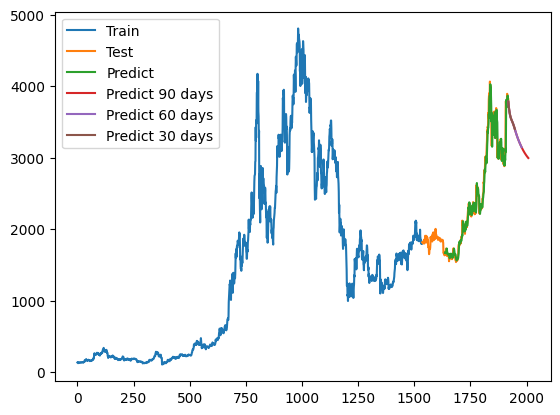

In [71]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 6. BNB/USD Dataset (Data split 8:2)

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [73]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [74]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [75]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [76]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [77]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [78]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [79]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [80]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 7s 140ms/step - loss: 0.0355 - val_loss: 0.0031
Epoch 2/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 3/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 4/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0032 - val_loss: 0.0027
Epoch 5/100
23/23 [==============================] - 2s 104ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 6/100
23/23 [==============================] - 2s 103ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 7/100
23/23 [==============================] - 2s 101ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 8/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 9/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 10/100
23/23 [==============================] - 2s 102ms/step - loss: 0.0025 - val_lo

In [81]:
y_pred=model.predict(X_test)

9/9 [==============================] - 1s 22ms/step


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 50.554641122596585
RMSE: 0.020533962793905944
MAE: 0.012449445950773791


In [83]:
y_pred=scaler.inverse_transform(y_pred)

In [84]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

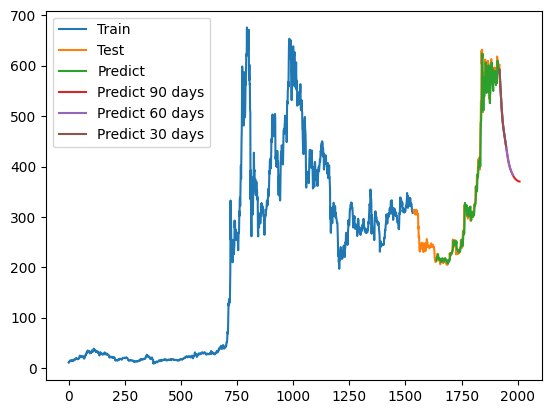

In [85]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 7. BTC/USD Dataset (Data split 9:1)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [87]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [88]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [89]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [90]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [91]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [92]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [93]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [94]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 7s 129ms/step - loss: 0.0187 - val_loss: 0.0081
Epoch 2/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 3/100
26/26 [==============================] - 3s 98ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 4/100
26/26 [==============================] - 3s 101ms/step - loss: 0.0019 - val_loss: 0.0058
Epoch 5/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0016 - val_loss: 0.0069
Epoch 6/100
26/26 [==============================] - 3s 100ms/step - loss: 0.0016 - val_loss: 0.0110
Epoch 7/100
26/26 [==============================] - 3s 101ms/step - loss: 0.0016 - val_loss: 0.0029
Epoch 8/100
26/26 [==============================] - 3s 101ms/step - loss: 0.0015 - val_loss: 0.0071
Epoch 9/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 10/100
26/26 [==============================] - 3s 98ms/step - loss: 0.0013 - val_loss: 0

In [95]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 22ms/step


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 6.085946243002171
RMSE: 0.03175157248858322
MAE: 0.02411011056158523


In [97]:
y_pred=scaler.inverse_transform(y_pred)

In [98]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.67816075 0.69006631 0.6922986  0.7321222  0.76893337 0.84700299
 0.8282852  0.84601086 0.84025709 0.85675124 0.93045289 0.86642594
 0.89900614 0.91005079 0.92889692 0.93164979 0.94071739 0.98616066
 0.97718391 1.         0.97590914 0.94829968 0.88843016 0.93269527
 0.92119494 0.84132997 0.9248289  0.89098835 0.86607985 0.86986523
 0.91591704 0.95427553 0.95592523 0.94765509 0.96671175 0.9540549
 0.9503099  0.97547364 0.95092132 0.88989384 0.89765061 0.93404936
 0.92443378 0.93984495 0.94663844 0.97927055 0.94369089 0.96496255
 0.95601897 0.91434377 0.86813765 0.89357827 0.86068659 0.86635961
 0.83011516 0.86169746 0.86671435 0.88321138 0.88284078 0.91003637
 0.90414993 0.87366502 0.87652461 0.86602217 0.86158066 0.85649888
 0.86720465 0.82145566 0.78788766 0.79894817 0.85287069 0.86757958
 0.86921054 0.85725451 0.84511391 0.82921244 0.85598551 0.82319333
 0.82356826 0.83305694 0.85405461 0.83440526 0.90115768 0.88696071
 0.91303295 0.91137747 0.90225796 0.97655085 0.9578

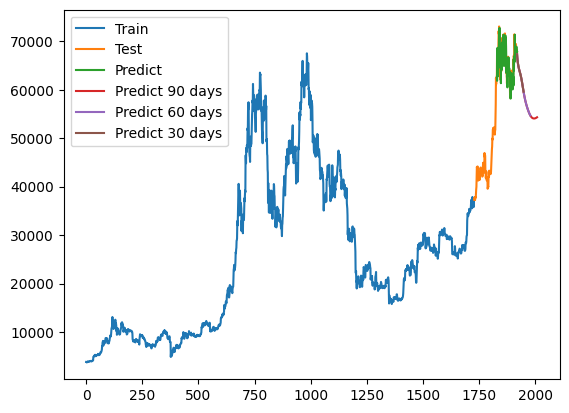

In [99]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 8. ETH/USD Dataset (Data split 9:1)

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [101]:
df = pd.read_csv('../Dataset/ETH_USD-Binance-Historical-Data-1_New.csv')
df = df.sort_index(ascending=False)
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
df1=df.reset_index()['Price']

In [102]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [103]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [104]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [105]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [106]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [107]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [108]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 7s 130ms/step - loss: 0.0284 - val_loss: 0.0065
Epoch 2/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0039 - val_loss: 0.0062
Epoch 3/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0029 - val_loss: 0.0065
Epoch 4/100
26/26 [==============================] - 3s 101ms/step - loss: 0.0026 - val_loss: 0.0058
Epoch 5/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0025 - val_loss: 0.0061
Epoch 6/100
26/26 [==============================] - 3s 104ms/step - loss: 0.0023 - val_loss: 0.0052
Epoch 7/100
26/26 [==============================] - 3s 98ms/step - loss: 0.0024 - val_loss: 0.0061
Epoch 8/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 9/100
26/26 [==============================] - 3s 102ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 10/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0019 - val_loss: 0

In [109]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 22ms/step


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 11.256495659927126
RMSE: 0.02799669938346311
MAE: 0.019478264705355137


In [111]:
y_pred=scaler.inverse_transform(y_pred)

In [112]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.59879885 0.61369724 0.63929659 0.65279512 0.66687232 0.69683502
 0.68750625 0.70757428 0.70483628 0.71930493 0.74864642 0.73360763
 0.78859953 0.80040038 0.80325539 0.80791872 0.80222784 0.84196608
 0.82381699 0.82901004 0.80291713 0.77302463 0.72675518 0.75249707
 0.72603824 0.65045495 0.72483199 0.72018994 0.68642552 0.68616384
 0.71221208 0.74103236 0.74032605 0.7218004  0.7343501  0.72378316
 0.72315983 0.75300127 0.72230886 0.67448426 0.68142606 0.68499376
 0.68296419 0.69022723 0.71196742 0.76318314 0.72320876 0.73131001
 0.72224929 0.66640216 0.61620548 0.64775312 0.63678622 0.63308237
 0.61232079 0.62904876 0.6273532  0.64866578 0.64678726 0.65793286
 0.66216645 0.64534061 0.64848708 0.64318127 0.66970818 0.67100378
 0.66134739 0.6183946  0.60961896 0.61258034 0.6370713  0.64027733
 0.64433859 0.62848074 0.61669904 0.60998275 0.62305154 0.59615446
 0.5967161  0.60029869 0.60492585 0.59022532 0.62272604 0.60363024
 0.63491621 0.64147933 0.63067199 0.75599669 0.783

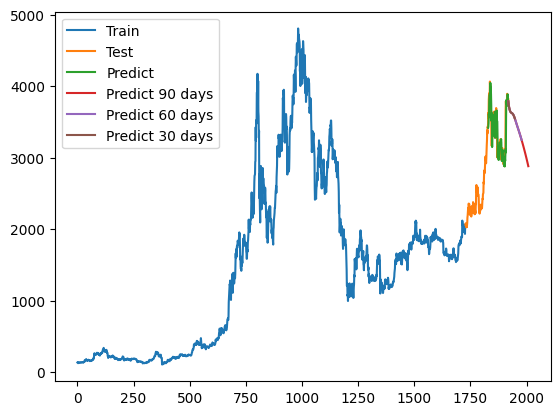

In [113]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()

# 9. BNB/USD Dataset (Data split 9:1)

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [143]:
df = pd.read_csv('../Dataset/BNB_USD-Binance-Historical-Data_New.csv')
df = df.sort_index(ascending=False)
df1=df.reset_index()['Price']

In [144]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [145]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:]

In [146]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [147]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [148]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [149]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [150]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
26/26 [==============================] - 8s 129ms/step - loss: 0.0351 - val_loss: 0.0060
Epoch 2/100
26/26 [==============================] - 3s 96ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 3/100
26/26 [==============================] - 3s 96ms/step - loss: 0.0035 - val_loss: 0.0076
Epoch 4/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0029 - val_loss: 0.0085
Epoch 5/100
26/26 [==============================] - 3s 96ms/step - loss: 0.0027 - val_loss: 0.0042
Epoch 6/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 7/100
26/26 [==============================] - 3s 98ms/step - loss: 0.0022 - val_loss: 0.0079
Epoch 8/100
26/26 [==============================] - 3s 99ms/step - loss: 0.0020 - val_loss: 0.0092
Epoch 9/100
26/26 [==============================] - 3s 97ms/step - loss: 0.0018 - val_loss: 0.0048
Epoch 10/100
26/26 [==============================] - 3s 98ms/step - loss: 0.0017 - val_loss: 0.005

In [151]:
y_pred=model.predict(X_test)

3/3 [==============================] - 1s 19ms/step


In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest,y_pred)

print("MAPE:", mape )
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 8.908764631295362
RMSE: 0.03161345242227278
MAE: 0.02197879174891424


In [153]:
y_pred=scaler.inverse_transform(y_pred)

In [154]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.54918721 0.55848479 0.56868214 0.58832703 0.57782976 0.60782197
 0.58457801 0.59687481 0.60227341 0.60797193 0.61352048 0.57737988
 0.62971627 0.69764861 0.71564393 0.71834323 0.77952732 0.76903005
 0.79242397 0.93143783 0.89079839 0.93398716 0.85060884 0.84341071
 0.81911703 0.74803551 0.8207666  0.81656769 0.81611781 0.81401836
 0.83741227 0.86650471 0.85660728 0.84715974 0.86050627 0.90459481
 0.88704937 0.89619699 0.850009   0.81206886 0.82781477 0.86380541
 0.8527083  0.86440525 0.86185592 0.86530502 0.85660728 0.90054586
 0.89274789 0.87940136 0.815368   0.83561274 0.81446824 0.79212405
 0.7873253  0.81401836 0.81701758 0.84206106 0.85525763 0.89259792
 0.89514726 0.89889629 0.90594445 0.8827005  0.88015116 0.88644952
 0.87490253 0.8534581  0.82871453 0.82646512 0.86605483 0.86425529
 0.87355288 0.86815428 0.85165857 0.86875412 0.88090097 0.86425529
 0.87415272 0.87805171 0.87340292 0.83651251 0.85720713 0.83966169
 0.85735709 0.85630736 0.84775958 0.88569972 0.913

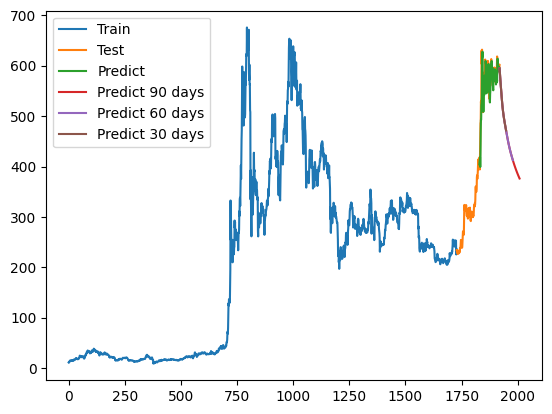

In [155]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:90]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:60]))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output[0:30]))
plt.legend(['Train','Test','Predict','Predict 90 days','Predict 60 days','Predict 30 days'])
plt.show()